# COMPIII - CCM - 2º semestre de 2023
# Nelson Kuhl (nmkuhl@usp.br)
## Método de Newton

Lembremos o **Teorema do ponto fixo:**

$$
\begin{array}{ll}
    \bullet & f:[a,b]\to R \text{ contínua, com raiz isolada }\bar{x}\text{ (i.e. uma única raiz }\bar{x}\text{ no intervalo } (a,b)\\
    \bullet & \Phi:[a,b]\to R \text{ tal que } \Phi(\bar{x}) = \bar{x} \text{ satisfazendo}\\
    (i) & \Phi \text{ e } \Phi' \text{ são contínuas em } [a,b]\\
    (ii) & \max_{x\in[a,b]}\vert\Phi'(x)\vert = L < 1
\end{array}
$$

Se $x_0\in[a,b]$ for tal que $x_{n+1}=\Phi(x_n)\in[a,b]$, $\forall n\ge0$, então a sequência $\{x_n\}$ converge para $\bar{x}$.

**Observação**: Sob as hipóteses $(i)$ e $(ii)$, se escolhermos $x_0$ como o extremo do intervalo mais próximo de $\bar{x}$, então a sequência de aproximações sucessivas $\{x_n\}$, $n\ge0$, estará contida no intervalo $[a,b]$.


Suponha que as hipóteses $(i)$ e $(ii)$ estejam satisfeitas e que $\{x_n\}_{n\ge0}$ é uma sequência convergindo para $\bar{x}$. Então,

$$
    \vert x_{n+1} - \bar{x}\vert = \vert\Phi(x_n) - \Phi(\bar{x})\vert = \vert\Phi^{\prime}(t_n)\vert\cdot\vert x_n - \bar{x}\vert,\quad \forall n \ge 0,
$$

onde $t_n$ é um ponto entre $x_n$ e $\bar{x}$ (use o Teorema do Valor Médio). Como $x_n$ converge para $\bar{x}$, segue que $t_n$ também converge para $\bar{x}$. E como $\Phi^{\prime}$ é contínua, a sequência $\vert\Phi^{\prime}(t_n)\vert$ converge para $\vert\Phi^{\prime}(\bar{x})\vert$. Logo,

$$
    \lim_{n\to\infty}\frac{\vert x_{n+1} - \bar{x}\vert}{\vert x_n - \bar{x}\vert} = \vert\Phi^{\prime}(\bar{x})\vert,
$$

o que nos mostra que, assintoticamente, a velocidade de convergência é determinada por $\vert\Phi^{\prime}(\bar{x})\vert$. Quanto menor este valor, mais rápida será a convergência. Para o Método de Newton, este valor é igual a zero.


### O Método de Newton
O Método de Newton (MN) é um *caso particular* do método das aproximações sucessivas, com

$$
    \Phi(x) = x - \frac{f(x)}{f^{\prime}(x)}.
$$

Ele está bem definido se $f^{\prime}(x) \ne 0$, o que vamos supor daqui em diante. Como $f(\bar{x}) = 0$, concluimos que $\Phi(\bar{x}) = \bar{x}$. Usando um pouco de cálculo, obtemos também:

$$
    \Phi^{\prime}(x) = \frac{f(x)\,f^{\prime\prime}(x)}{f^{\prime}(x)^2} \quad \Longrightarrow \quad \Phi^{\prime}(\bar{x}) = 0.
$$

Vejamos o que acontece no exemplo para a função $f(x) = x^3 - 3x^2 + 1$, que tem uma raiz isolada no intervalo $[0.5, 1]$, partindo-se de $x_0 = 0.5$.


In [ ]:
import numpy as np, matplotlib.pyplot as plt

In [ ]:
def f(x): return x**3 - 3*x**2 + 1.0       # Função

def df(x): return 3*x**2 - 6*x             # Derivada

In [ ]:
def phi_newton(x, func, dfunc): return x - func(x) / dfunc(x) # Método de Newton. A função (func) e a sua derivada
                                                              # (dfunc) são passadas como parâmetros.

In [ ]:
n = 0; xn = 0.5; print("x_{} = {}".format(n, xn))
for n in range(1, 7):
    xn = phi_newton(xn, f, df)
    print("x_{} = {}".format(n, xn))

Note que a partir de $x_4$ os resultados não mudam. Isto não significa que atingimos o ponto fixo, mas sim que não temos precisão chegar mais perto e é o melhor que podemos fazer. O valor da função na última aproximação calculada é


In [ ]:
print("f(x_{}) = {}".format(n, f(xn)))

Se olharmos para o gráfico de $f$,

In [ ]:
xx = np.linspace(-1, 3, 4001);     # pontos para o gráfico
plt.box(False)
plt.plot(xx, f(xx), label="f(x)")  # f(x)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

vemos que a raiz procurada está entre $0$ e $2$ e que $f^{\prime}(x) \ne 0$ para $0 < x < 2$ (faça as contas). Será que podemos começar com qualquer valor em $(0, 2)$ e convergir para a raiz?

In [ ]:
n = 0; xn = 0.01; print("x_{:2d} = {}".format(n, xn))
for n in range(1, 16):
    xn = phi_newton(xn, f, df)
    print("x_{:2d} = {}".format(n, xn))

print()
print("f(x_{}) = {}".format(n, f(xn)))

In [ ]:
n = 0; xn = 0.1; print("x_{:2d} = {}".format(n, xn))
for n in range(1, 11):
    xn = phi_newton(xn, f, df)
    print("x_{:2d} = {}".format(n, xn))

print()
print("f(x_{}) = {}".format(n, f(xn)))

Com $x_0 = 0.01$, aparentemente estamos convergindo para a maior raiz (isto ocorre de fato) e com $x_0 = 0.1$, convergimos para a menor raiz. Há também exemplos onde não há convergência. Afinal, o MN funciona? Precisamos olhar com mais detalhe como o teorema do ponto fixo se relaciona com o MN.

### Convergência do Método de Newton
Veremos como usar o teorema do ponto fixo para estudar a convergência do MN. Seja $f:[a,b] \to R$ com uma raiz *isolada* $\bar{x}$. Suponha que $f$ é derivável nesse intervalo. Para o MN estar bem definido, vamos supor também que

> (a) $f^{\prime}(x) \ne 0$ para $x \in [a,b]$.

Para $\Phi$ e $\Phi^{\prime}$ serem contínuas, precisamos também supor que

> (b) $f$, $f^{\prime}$ e $f^{\prime\prime}$ são contínuas em $[a,b]$.

E a derivada de $\Phi$? Como $\Phi^{\prime}$ é contínua e $\Phi^{\prime}(\bar{x})=0$, sob as hipótese (a) e (b) o que podemos afirmar é que

> Existe uma vizinhança de $\bar{x}$ contida em $[a,b]$,
$$
    \bar{x} \in [\alpha, \beta] \subset [a,b],
$$
tal que
$$
    \max_{x\in[\alpha,\beta]}\vert\Phi^{\prime}(x)\vert = L <1.
$$

Neste subintervalo $[\alpha,\beta]$ a convergência está garantida. O problema é que é difícil determinar este subintervalo. O que podemos garantir para o MN é a **convergência local**: sob as hipóteses (a) e (b), se começarmos *suficientemente próximos* da raiz, a sequência gerada pelo Método de Newton convergirá para ela (e a convergência será rápida). Em geral não temos como saber o quão próximo da raiz devemos começar as iterações, mas há maneiras práticas de se lidar com esse problema.

### Interpretação geométrica do Método de Newton
Suponha que $f$ tenha derivada não nula em um ponto $\bar x$ do seu domínio. A equação da reta tangente à curva
$y = f(x)$ que passa pelo ponto $(\bar x, f(\bar x)$) é

$$
    y(x) = f^{\prime}(\bar x)\,(x - \bar x) + f(\bar x).
$$

Logo, a intersecção desta reta com o eixo $x$ ocorre no ponto

$$
    x^* = \bar x - \frac{f(\bar x)}{f^{\prime}(\bar x)},
$$

o que nos leva à seguinte interpretação geométrica do Método de Newton:

> $x_{n+1}$ é a intersecção com o eixo
$x$ da reta tangente à curva $y=f(x)$ que passa pelo ponto $(x_n, f(x_n))$.

In [ ]:
xx = np.linspace(0.5, 0.7, 101);                        # pontos para o gráfico
yy = df(0.5)*(xx - 0.5) + f(0.5)                        # reta tangente
plt.box(False)
plt.plot(xx, f(xx), label="f(x)")                       # f(x)
plt.scatter(0.5, f(0.5), label="x_n")                   # x_n
plt.scatter(0.5 - f(0.5)/df(0.5), 0.0, label="x_(n+1)") # x_(n+1)
plt.plot(xx, yy, label="reta tangente")
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0.49, color='black', linewidth=.5)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### Um critério de convergência global para o método de Newton
A partir da interpretação geométrica, podemos podemos intuir o resultado abaixo, que pode ser demostrado rigorosamente:

**Teorema** Seja $f:[a,b] \to R$ tal que $f$, $f^{\prime}$ e $f^{\prime\prime}$ são contínuas. Suponha que

> (a) $f(a)\cdot f(b) < 0$;

> (b) $f^{\prime}(x) \ne 0$ para todo $x \in [a,b]$;

> (c) $f^{\prime\prime}$ não troca de sinal em $[a,b]$.

Então, escolhendo-se $x_0$ convenientemente, a sequência $\{x_n\}_{n\ge0}$ gerada pelo método de Newton converge monotonamente para a única raiz $\bar x$ de $f$ pertencente a $(a,b)$.

**Exercício** Verifique que

> (i) Se $f^{\prime} \cdot f^{\prime\prime} \le 0$, então podemos escolher $x_0 \in [a, \bar x)$ e a sequência será monótona crescente;

> (ii) se $f^{\prime} \cdot f^{\prime\prime} \ge 0$, então podemos escolher $x_0 \in (\bar x, b]$ e a sequência será monótona decrescente.

### Exemplo
Um tanque tem a forma de um cilindro reto, com raio igual a $r$ e comprimento $L$. Sua lateral circular é transparente e através dela podemos observar o nível de líquido no cilindro (deitado). A porcentagem de líquido no cilindro pode ser obtida como função do ângulo $\theta$ (veja a figura abaixo). Por exemplo, o cilindro está cheio para $\theta = 2\pi$ e pela metade para $\theta = \pi$. Usando o método de Newton, calcule o ângulo $\theta$ para o qual o cilindro tem um quarto do seu volume cheio.

$\phantom{aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa}$
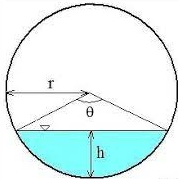



### Solução
É mais conveniente trabalharmos com o ângulo em relação à vertical $\varphi = 0.5\cdot\theta$. A porcentagem (em decimais) de líquido no cilindro é dada pela expressão

$$
    p(\varphi) = \frac{\varphi - 0.5\,\text{sen}\,(2\varphi)}{\pi}.
$$

No intervalo $[0, \pi]$, onde $\varphi$ varia, o gráfico de $p(\varphi)$ é


In [ ]:
def p(x): return (x - 0.5*np.sin(2*x))/np.pi
xx = np.linspace(0.0, np.pi, 3000)
plt.box(False)
plt.plot(xx, p(xx))
plt.xlabel("ângulo com a vertical")
plt.ylabel("porcentagem")
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5);

Vemos que para qualquer valor da procentagem entre $0$ e $1$ corresponde um único valor do ângulo $\varphi$. Para obtermos o ângulo correspondente a um quarto do volume, basta resolver a equação

$$
    \varphi - 0.5\,\text{sen}\,(2\varphi) - 0.25\,\pi = 0.
$$

Vejamos o gráfico de $f(\varphi) = \varphi - 0.5\,\text{sen}\,(2\varphi) - 0.25\,\pi$:

In [ ]:
def f(x): return x - 0.5*np.sin(2*x) - 0.25*np.pi

In [ ]:
plt.box(False)
plt.plot(xx, f(xx), label="f")
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

In [ ]:
print("f(1.0)= ", f(1))
print("f(1.5)= ", f(1.5))

A solução está entre $1.0$ e $1.5$ radianos. Dando um zoom no gráfico acima obtemos

In [ ]:
xx = np.linspace(1, 1.5, 1001)
plt.box(False)
plt.plot(xx, f(xx), label="f")
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(1, color='black', linewidth=.5)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

A figura sugere que (não é difícil provar) $f^{\prime} > 0$ e $f^{\prime\prime} > 0$ em $[1.0, 1.5]$. Logo, se escolhermos $x_0 = 1.5$, o método de Newton irá gerar uma squência monótona decrescente, convergente para a solução.

In [ ]:
def df(x): return 1.0 - np.cos(2*x)

In [ ]:
x = np.empty(11);
n = 0; x[n] = 1.5
print("x_{}= {}".format(n, x[n]))
for n in range(1,11):
    x[n] = phi_newton(x[n-1], f, df)
    print("x_{}= {}".format(n, x[n]))

Observe que a partir de $x_4$ as iterações oscilam entre dois valores (não há precisão suficiente para melhorar).

In [ ]:
print("f(x_4)= ", f(x[4]))
print("f(x_5)= ", f(x[5]))

Podemos afirmar que a solução é

$$
    \bar\varphi = 1.1549407300050286
$$

com erro menor do que $10^{-16}$ (POR QUE?)